In [1]:
import gzip
import json
import pandas as pd

In [3]:
import gzip
import json
import pandas as pd

# Load RNA-Seq data from the gzipped JSON file
dataset = '/dataset0.json.gz'
labels = '/data.info.labelled'

with gzip.open(dataset, 'rt', encoding='utf-8') as f:
    rna_data = [json.loads(line) for line in f]


In [7]:
labels_df = pd.read_csv(labels)

In [8]:
print("Label Data Preview:")
print(labels_df.head())
print("\nLabel Distribution:")
print(labels_df['label'].value_counts())

Label Data Preview:
           gene_id    transcript_id  transcript_position  label
0  ENSG00000004059  ENST00000000233                  244      0
1  ENSG00000004059  ENST00000000233                  261      0
2  ENSG00000004059  ENST00000000233                  316      0
3  ENSG00000004059  ENST00000000233                  332      0
4  ENSG00000004059  ENST00000000233                  368      0

Label Distribution:
label
0    116363
1      5475
Name: count, dtype: int64


In [9]:
print("\nRNA-Seq Data Preview (First Entry):")
print(rna_data[0])
print("\nTotal number of entries in RNA-Seq data:", len(rna_data))



RNA-Seq Data Preview (First Entry):
{'ENST00000000233': {'244': {'AAGACCA': [[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0.0093, 10.9, 84.1], [0.00631, 2.53, 125.0, 0.00844, 4.67, 126.0, 0.0103, 6.3, 80.9], [0.00465, 3.92, 109.0, 0.0136, 12.0, 124.0, 0.00498, 2.13, 79.6], [0.00398, 2.06, 125.0, 0.0083, 5.01, 130.0, 0.00498, 3.78, 80.4], [0.00664, 2.92, 120.0, 0.00266, 3.94, 129.0, 0.013, 7.15, 82.2], [0.0103, 3.83, 123.0, 0.00598, 6.45, 126.0, 0.0153, 1.09, 74.8], [0.00398, 3.75, 126.0, 0.00332, 4.3, 129.0, 0.00299, 1.93, 81.9], [0.00498, 3.93, 127.0, 0.00398, 2.51, 131.0, 0.0111, 3.47, 79.4], [0.0139, 4.69, 106.0, 0.0136, 6.21, 124.0, 0.00531, 10.6, 85.5], [0.00631, 3.5, 126.0, 0.0222, 5.38, 128.0, 0.00332, 1.72, 79.3], [0.0061, 3.99, 121.0, 0.0121, 7.27, 122.0, 0.00232, 1.27, 78.9], [0.00299, 1.99, 128.0, 0.00427, 4.85, 124.0, 0.00332, 3.18, 80.5], [0.0186, 3.62, 124.0, 0.00428, 2.25, 129.0, 0.00554, 2.78, 80.1], [0.0093, 3.12, 125.0, 0.00398, 8.84, 129.0, 0.00361, 1.86, 82.0], [0.0

In [10]:
rows = []
for entry in rna_data:
    for transcript_id, positions in entry.items():
        for position, nucleotides in positions.items():
            for nucleotide, features in nucleotides.items():
                for feature_set in features:
                    row = [transcript_id, position, nucleotide] + feature_set
                    rows.append(row)

# Create DataFrame for RNA-Seq data
columns = ['transcript_id', 'position', 'nucleotide'] + [f'feature_{i+1}' for i in range(9)]  # Assuming there are 9 features
rna_df = pd.DataFrame(rows, columns=columns)

# Preview the RNA-Seq DataFrame
print("\nRNA-Seq DataFrame Preview:")
print(rna_df.head())


RNA-Seq DataFrame Preview:
     transcript_id position nucleotide  feature_1  feature_2  feature_3  \
0  ENST00000000233      244    AAGACCA    0.00299       2.06      125.0   
1  ENST00000000233      244    AAGACCA    0.00631       2.53      125.0   
2  ENST00000000233      244    AAGACCA    0.00465       3.92      109.0   
3  ENST00000000233      244    AAGACCA    0.00398       2.06      125.0   
4  ENST00000000233      244    AAGACCA    0.00664       2.92      120.0   

   feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  
0    0.01770      10.40      122.0    0.00930      10.90       84.1  
1    0.00844       4.67      126.0    0.01030       6.30       80.9  
2    0.01360      12.00      124.0    0.00498       2.13       79.6  
3    0.00830       5.01      130.0    0.00498       3.78       80.4  
4    0.00266       3.94      129.0    0.01300       7.15       82.2  


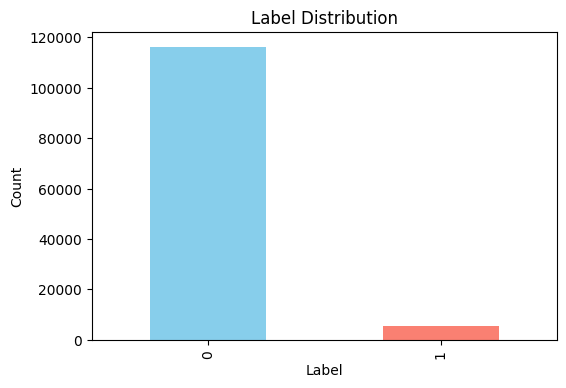

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
labels_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

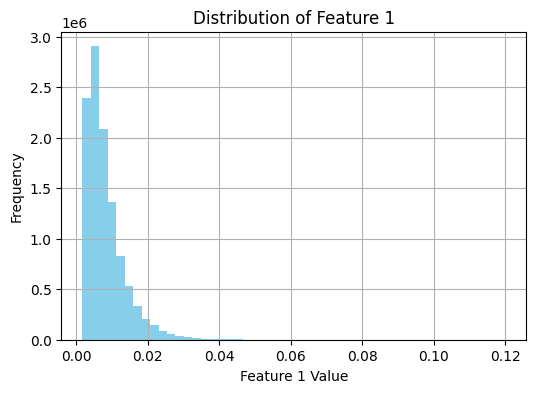

In [12]:
plt.figure(figsize=(6,4))
rna_df['feature_1'].hist(bins=50, color='skyblue')
plt.title('Distribution of Feature 1')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
aggregated_df = rna_df.groupby(['transcript_id', 'position', 'nucleotide']).mean().reset_index()

# Display the aggregated DataFrame
aggregated_df.head()

,transcript_id,position,nucleotide,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788


In [17]:
# Convert 'position' column in aggregated_df to int64
aggregated_df['position'] = aggregated_df['position'].astype(int)

# Convert 'transcript_position' column in labels_df to int64 (if needed)
# Assuming labels_df also has a column named 'transcript_position'
labels_df['transcript_position'] = labels_df['transcript_position'].astype(int)

# Now perform the merge
final_df = aggregated_df.merge(labels_df, left_on=['transcript_id', 'position'], right_on=['transcript_id', 'transcript_position'], how='left')

final_df.head()

,transcript_id,position,nucleotide,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gene_id,transcript_position,label
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270,ENSG00000004059,244,0
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698,ENSG00000004059,261,0
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324,ENSG00000004059,316,0
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000,ENSG00000004059,332,0
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788,ENSG00000004059,368,0


In [18]:
from sklearn.model_selection import train_test_split

unique_genes = final_df['gene_id'].unique()
train_genes, test_genes = train_test_split(unique_genes, test_size=0.3, random_state=42)

train_df = final_df[final_df['gene_id'].isin(train_genes)]
test_df = final_df[final_df['gene_id'].isin(test_genes)]

In [19]:
train_df.head()

,transcript_id,position,nucleotide,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gene_id,transcript_position,label
18,ENST00000000412,1190,GTGACTT,0.007106,4.313182,103.048485,0.007846,7.830606,122.181818,0.008827,3.241364,90.765152,ENSG00000003056,1190,0
19,ENST00000000412,1209,TAAACCT,0.008164,1.991226,104.501613,0.006083,3.149129,99.582258,0.006428,2.160387,85.356452,ENSG00000003056,1209,0
20,ENST00000000412,1250,ATGACCA,0.008888,5.232500,87.517857,0.006250,7.535536,118.892857,0.006159,3.139107,79.283929,ENSG00000003056,1250,0
21,ENST00000000412,1283,ATGACCA,0.007014,5.788033,90.090164,0.006673,8.068689,116.704918,0.007498,4.109180,80.998361,ENSG00000003056,1283,0
22,ENST00000000412,1343,CAAACCA,0.007237,2.338769,105.738462,0.006641,3.973538,95.776923,0.006715,1.910215,81.786154,ENSG00000003056,1343,0


In [20]:
# Features and labels for training
X_train = train_df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']]
y_train = train_df['label']

# Features and labels for testing
X_test = test_df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']]
y_test = test_df['label']

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     35491
           1       0.00      0.00      0.00      1615

    accuracy                           0.96     37106
   macro avg       0.48      0.50      0.49     37106
weighted avg       0.91      0.96      0.94     37106



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


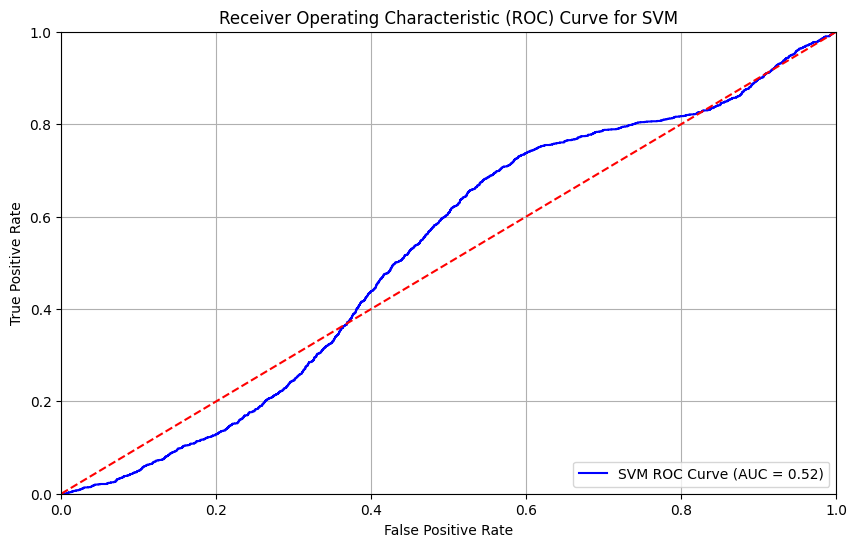

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y_train = y_train.astype(int)
y_test = y_test.astype(int)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)

auc_score_svm = roc_auc_score(y_test, y_scores_svm)

y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM ROC Curve (AUC = {auc_score_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()